# Projectile Motion
Project inspired from pages 48 to 53 of Saha, A. (2015) *Doing Math With Python: Use Programming to Explore Algebra, Statistics, Calculus, and More* No Starch Press: San Francisco, CA.

Modified for Jupyter. Added Pandas DataFrame functionality. Coordinate data can be returned in a Pandas DataFrame using the `draw_trajectory(u, theta)` function.

In [1]:
from matplotlib import pyplot as plt
import math
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# A function to generate range of increments.
def frange(start, final, interval):
    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval
    
    return numbers

In [3]:
# A function to generate the graph.
def draw_graph(x, y):
    plt.plot(x, y)
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.title('Projectile motion of a ball')

In [4]:
# A function to draw trajectory coordinate data.
def draw_trajectory(u, theta):
    df_to_graph = make_trajectory_df(u, theta)
    draw_graph(df_to_graph['y'], df_to_graph['x'])

In [5]:
# A function to generate trajectory data and return data frame.
def make_trajectory_df(u, theta):
    theta = math.radians(theta)
    g = 9.8
    
    # Time of flight
    t_flight = 2*u*math.sin(theta)/g
    # Find time intervals
    intervals = frange(0, t_flight, 0.01)
    
    # Make lists for x and y coordinatres.
    x = []
    y = []
    for t in intervals:
        x.append(u*math.cos(theta)*t)
        y.append(u*math.sin(theta)*t - .5*g*t*t)
        
    trajectory_data_frame = pd.DataFrame(x, y,).reset_index()
    trajectory_data_frame['x'] = trajectory_data_frame['index']
    trajectory_data_frame['y'] = trajectory_data_frame[0]
    trajectory_data_frame = trajectory_data_frame.drop(columns=['index'])
    trajectory_data_frame = trajectory_data_frame.drop([0], axis=1)
    return trajectory_data_frame

Enter the initial velocity in m/sec: 25
Enter the angle of projection in degrees: 60


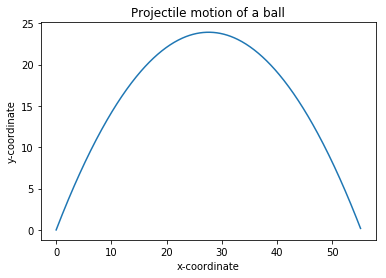

In [6]:
# Execute the full program.
try:
    u = float(input('Enter the initial velocity in m/sec: '))
    theta = float(input('Enter the angle of projection in degrees: '))
except ValueError:
    print('You entered an invalid input')
else:
    draw_trajectory(u, theta)
    plt.show()
    mydf = make_trajectory_df(u, theta)

In [7]:
mydf.head()

,x,y
0,0.000000,0.000
1,0.216016,0.125
2,0.431053,0.250
3,0.645109,0.375
4,0.858185,0.500


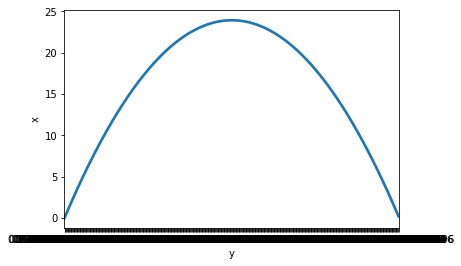

In [8]:
sns.pointplot(x=mydf['y'], y=mydf['x'], markers='')

<function matplotlib.pyplot.show>

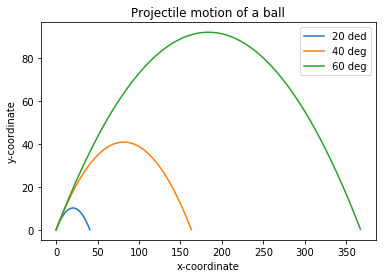

In [9]:
u_list = [20, 40, 60]
theta = 45
for u in u_list:
    draw_trajectory(u, theta)
    
plt.legend(['20 ded', '40 deg', '60 deg'])
plt.show